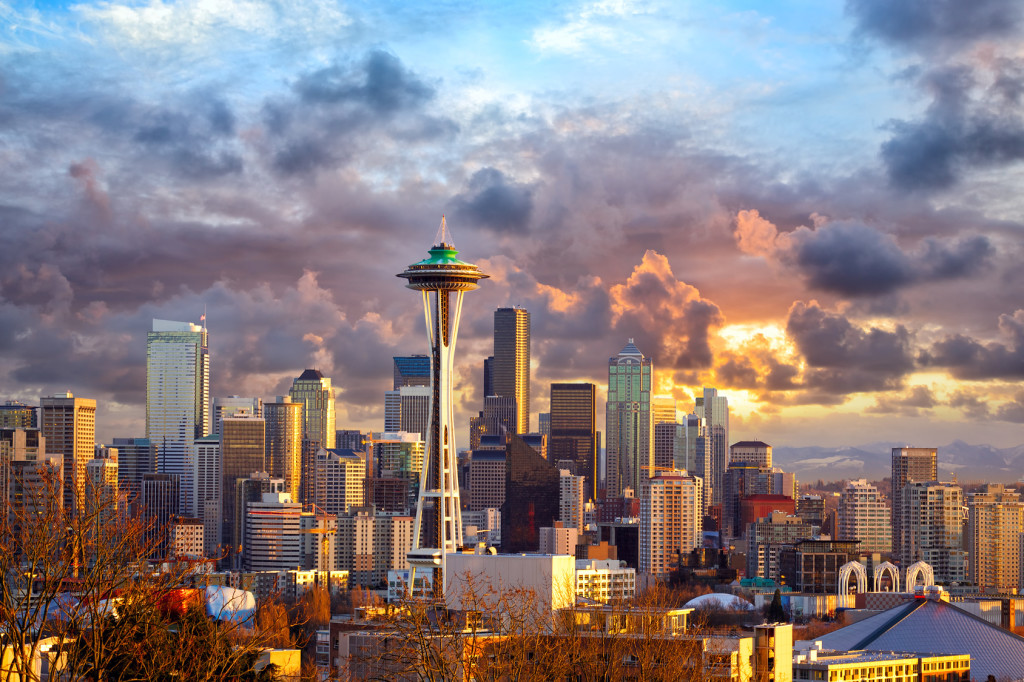

# Seattle weather precipitation

# notebook 3 - regression:


## In this notebook, we will clean the data, reshape , visualize and finally make some predictions about average temperature given data and amount of precipitation in Seattle. Enjoy!

### Content
--given column--  
DATE = the date of the observation (we will split this column to day, year and month)  
PRCP = the amount of precipitation, in inches  
TMAX = the maximum temperature for that day, in degrees Fahrenheit  
TMIN = the minimum temperature for that day, in degrees Fahrenheit  
RAIN = TRUE if rain was observed on that day, FALSE if it was not (we will turn this to 0 or 1)  

## to get the most from our data we will make 5 more features.   

--new column--  
year = the year of the observation  
month = the month of the observation  
day = the day of the observation  
TAVG = the average temperature for that day, in degrees Fahrenheit  
seasons = 0 for winter , 1 for summer  


kaggle link - https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017

## Imports and read form csv:

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyRegressor
rain = pd.read_csv('data/seattleWeather_1948-2017.csv')


## Basic info:

In [75]:
rain.shape

(25551, 5)

In [76]:
rain.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [77]:
rain.tail()

,DATE,PRCP,TMAX,TMIN,RAIN
25546,2017-12-10,0.0,49,34,False
25547,2017-12-11,0.0,49,29,False
25548,2017-12-12,0.0,46,32,False
25549,2017-12-13,0.0,48,34,False
25550,2017-12-14,0.0,50,36,False


In [78]:
rain.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [79]:
rain.isna().sum() 

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

# Preproces Data

### We can see that are some null values in RAIN and PRCP colums.
### We can afford to drop them because there are only 3 null values.

In [80]:
rain = rain.dropna(axis=0).reset_index()

### also we can drop the index colum

In [81]:
rain = rain.drop('index', axis = 1)


### Now we will split the date to 3 features - day , month and years.

We will try to predict TAVG (average temperature) given the date and amount of precipitation.
Therefore we will need to add a column TAVG.



In [82]:
rain_to_plot = rain.copy()
rain['DATE'] = pd.to_datetime(rain['DATE'])# convert to datetime object
rain['year'] = rain['DATE'].dt.year
rain['month'] = rain['DATE'].dt.month
rain['day'] = rain['DATE'].dt.day
rain['TAVG'] = (rain['TMIN'] + rain['TMAX'])/2 # add new feature, we will try to predict this feature.
rain['seasons'] = 1
rain.loc[(rain.month < 5) | (rain.month > 9) , "seasons"] = 0 # winter is 0, summer is 1
rain = rain.drop('DATE', axis =1)
rain

,PRCP,TMAX,TMIN,RAIN,year,month,day,TAVG,seasons
0,0.47,51,42,True,1948,1,1,46.5,0
1,0.59,45,36,True,1948,1,2,40.5,0
2,0.42,45,35,True,1948,1,3,40.0,0
3,0.31,45,34,True,1948,1,4,39.5,0
4,0.17,45,32,True,1948,1,5,38.5,0
...,...,...,...,...,...,...,...,...,...
25543,0.00,49,34,False,2017,12,10,41.5,0
25544,0.00,49,29,False,2017,12,11,39.0,0
25545,0.00,46,32,False,2017,12,12,39.0,0
25546,0.00,48,34,False,2017,12,13,41.0,0


### convert RAIN to 0 or 1.

In [83]:
rain['RAIN'] = rain['RAIN'].astype(np.int)
rain

,PRCP,TMAX,TMIN,RAIN,year,month,day,TAVG,seasons
0,0.47,51,42,1,1948,1,1,46.5,0
1,0.59,45,36,1,1948,1,2,40.5,0
2,0.42,45,35,1,1948,1,3,40.0,0
3,0.31,45,34,1,1948,1,4,39.5,0
4,0.17,45,32,1,1948,1,5,38.5,0
...,...,...,...,...,...,...,...,...,...
25543,0.00,49,34,0,2017,12,10,41.5,0
25544,0.00,49,29,0,2017,12,11,39.0,0
25545,0.00,46,32,0,2017,12,12,39.0,0
25546,0.00,48,34,0,2017,12,13,41.0,0


## now we have all the relevant data in numerical

# Visualization:

## The main goal is to find a connection between the degrees, the precipitation and the date.

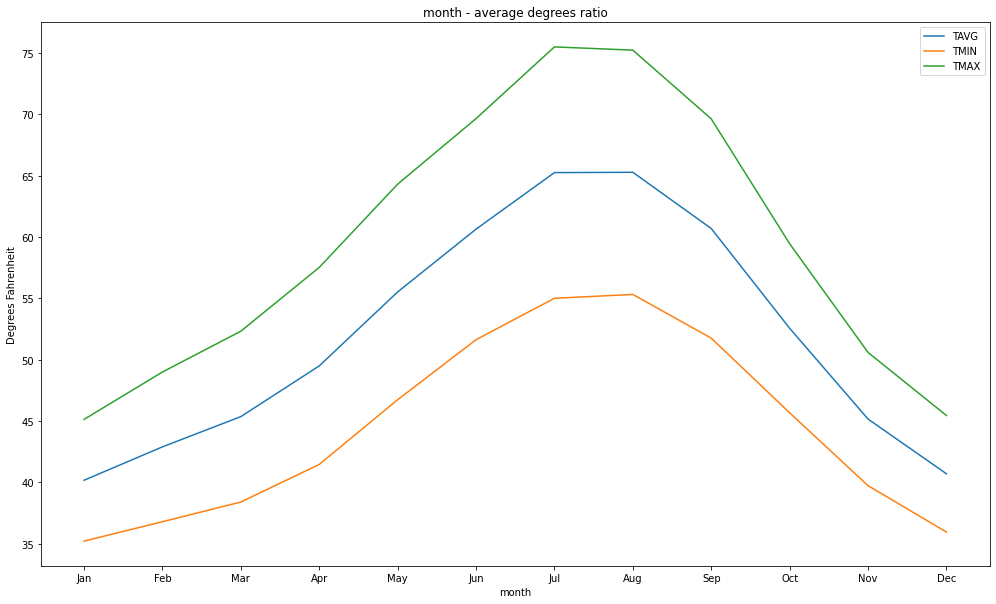

In [84]:
plot_rain = rain.groupby(['month']).mean()
plt.figure(figsize=(17,10))
plt.title('month - average degrees ratio')
plt.ylabel('Degrees Fahrenheit')
plot_rain['TAVG'].plot()
plot_rain['TMIN'].plot()
plot_rain['TMAX'].plot()
plt.xticks(ticks=np.arange(1,13), labels=[ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'])

plt.legend()



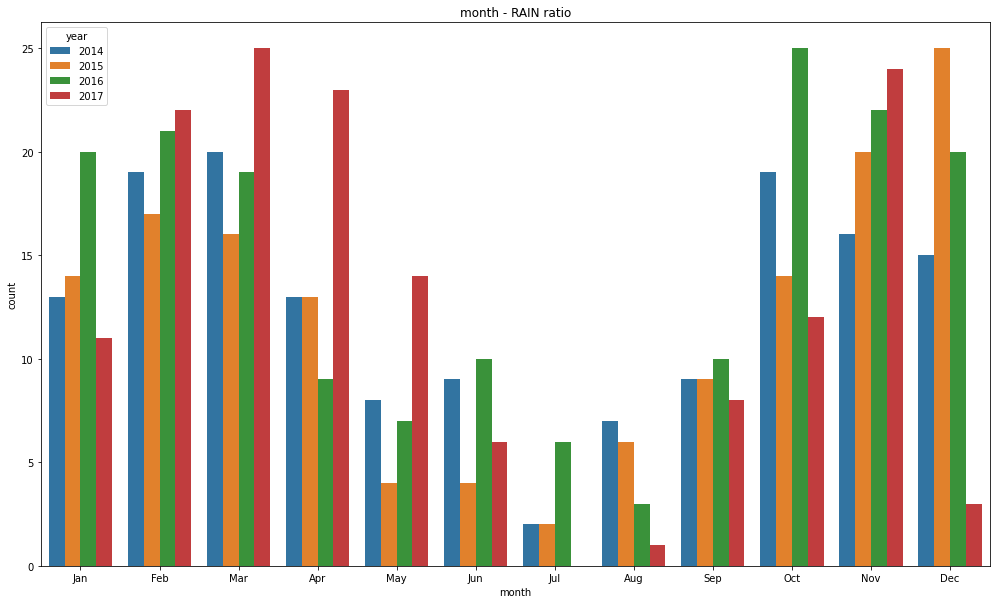

In [85]:
plt.figure(figsize=(17,10))
plt.title('month - RAIN ratio')
sns.countplot(data = rain[(rain['RAIN'] == 1) & (rain['year'] >= 2014)], x='month', hue='year')
plt.xticks(ticks=np.arange(0,12), labels=[ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'])
plt.show()

## We can see that the forecast is behaving as expected. 
Summer is hotter than winter.
And in winter it rains more

<Figure size 1224x720 with 0 Axes>

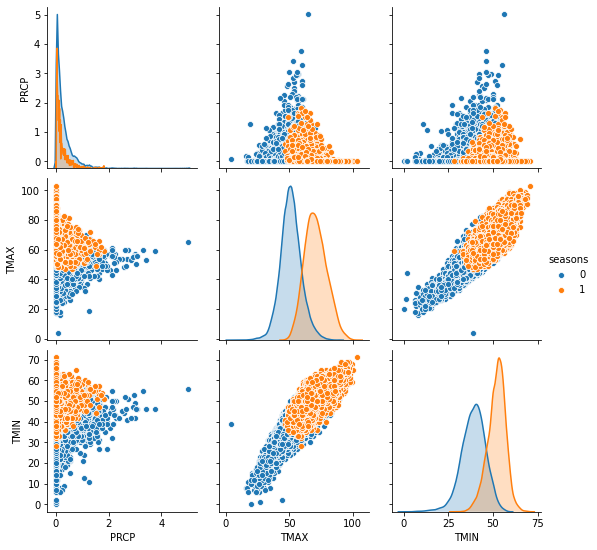

In [86]:
plt.figure(figsize=(17,10))
sns.pairplot(rain, vars = ['PRCP','TMAX','TMIN'], hue ='seasons')
plt.show()

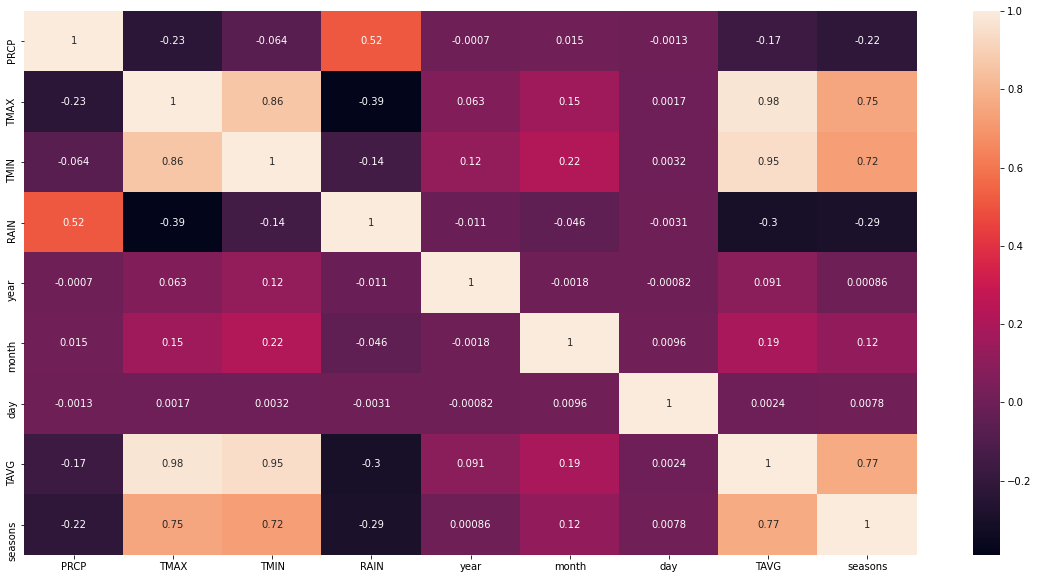

In [87]:
plt.figure(figsize=(20,10))
sns.heatmap(rain.corr(),annot=True)

There is a correlation between rainfall, precipitation and temperature

# Model  and tests:

In [88]:
# Split Data
y = rain['TAVG']
x = rain.drop(['TAVG','TMAX','TMIN'], axis =1)

#split x and y to trin and test
x_train , x_test , y_train , y_test = split(x,y ,train_size = 0.8 , shuffle = True , random_state = 1)

#scal data
scal_x_train = pd.DataFrame(StandardScaler().fit(x_train).transform(x_train),columns=x.columns)
scal_x_test = pd.DataFrame(StandardScaler().fit(x_train).transform(x_test),columns=x.columns)

### Find the optimal K for knn:

In [89]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k).fit(scal_x_train, y_train)
    Optional_K = knn.score(scal_x_test, y_test)
    k_scores.append(Optional_K.mean())
print(k_scores)

[0.6176921067640826, 0.7273412784412101, 0.7689332987369288, 0.7837730325868555, 0.7882161171409816, 0.7895831009660599, 0.789270380051089, 0.7899777754805306, 0.7909435052158194, 0.7914341408798145, 0.7912131886769594, 0.7910645029326984, 0.7904238007237787, 0.7902865769330307, 0.7901523589598652, 0.7907805341787633, 0.7903010757251583, 0.789909476275771, 0.7888495370387105, 0.787747892693882, 0.7877298504179879, 0.786641734301773, 0.7854557010710479, 0.7851520288256721, 0.7845460430982718, 0.7837057026568957, 0.7832580131940898, 0.7822853396424817, 0.7811936431621209, 0.780570152837574]


Text(0, 0.5, 'Cross validated score')

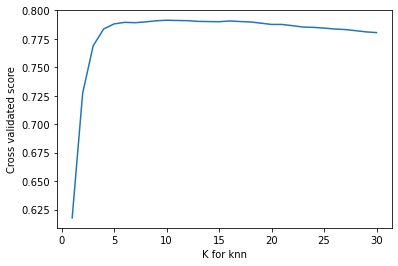

In [90]:
plt.plot(k_range, k_scores)
plt.xlabel('K for knn')
plt.ylabel('Cross validated score')

K = 11 is optimal!

## Trining our models:

In [98]:
LR = LinearRegression().fit(scal_x_train, y_train)
KNN = KNeighborsRegressor(n_neighbors=11).fit(scal_x_train, y_train)
Dummy = DummyRegressor(strategy="median").fit(scal_x_train, y_train)

## Testing with r^2 score:

### r^2 is a measure of how close each data point fits to the regression line

In [99]:
print("LinearRegression R^2: {:.2f}%".format(LR.score(scal_x_test, y_test)*100)) # without spliting to seasons this score was 21%(!)
print("KNeighborsRegressor R^2: {:.2f}%".format(KNN.score(scal_x_test, y_test)*100))
print("DummyRegressor R^2: {:.2f}%".format(Dummy.score(scal_x_test, y_test)*100))

LinearRegression R^2: 61.15%
KNeighborsRegressor R^2: 79.12%
DummyRegressor R^2: -0.23%


r^2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

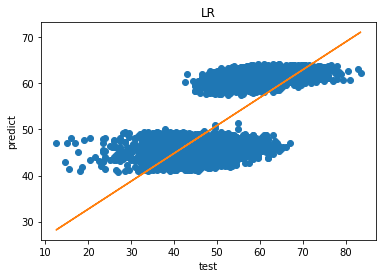

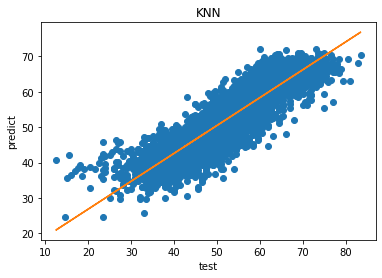

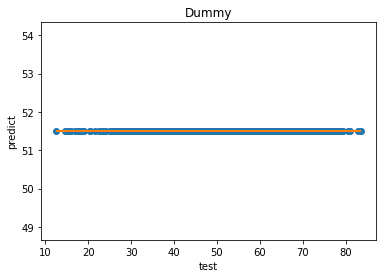

In [93]:
LR_pred = LR.predict(scal_x_test)
KNN_pred = KNN.predict(scal_x_test)
Dummy_pred = Dummy.predict(scal_x_test)
pred = [(LR_pred, "LR"), (KNN_pred, "KNN"), (Dummy_pred, "Dummy")]
for i , j in pred:
    plt.subplots()
    plt.title(j)
    plt.xlabel('test')
    plt.ylabel('predict')
    plt.plot(y_test, i, 'o')
    ln, b = np.polyfit(y_test, i,1)
    plt.plot(y_test,ln*y_test+b)# Regression Line
   


# KNeighbors Regressor model is the best for this case